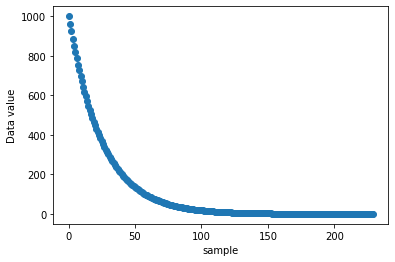

In [14]:
#importing modules

import matplotlib.pyplot as plt
import numpy as np


#simulation parameters 

population_size= 2.3e5
sample_size = 50
number_of_samples = 500


#generate the population of numbers
population = 1/ np.logspace(np.log10(.001),np.log10(10),int(population_size))

#true mean 
true_mean = np.mean(population)

skip = int(1e3)
plt.plot(population[::skip],'o')
plt.xlabel('sample')
plt.ylabel('Data value')
plt.show()

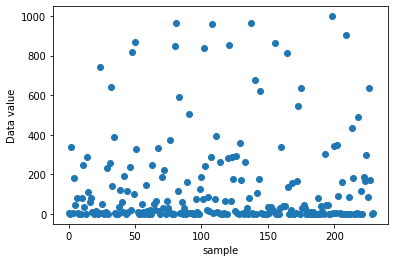

In [15]:
#shuffling the data

np.random.shuffle(population)

plt.plot(population[::skip],'o')
plt.xlabel('sample')
plt.ylabel('Data value')
plt.show()


In [16]:
samplemeans = np.zeros(number_of_samples)

for expi in range(number_of_samples):
  randsample = np.random.choice(population,size=sample_size)
  samplemeans[expi]= np.mean(randsample)

<function matplotlib.pyplot.show>

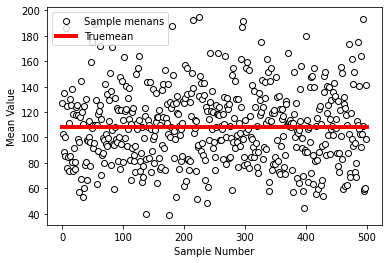

In [19]:
plt.plot(samplemeans,'ko',markerfacecolor = 'w', label ='Sample menans')
plt.plot([0,number_of_samples],[true_mean,true_mean],'r',linewidth=4,label='Truemean')
plt.legend()
plt.xlabel('Sample Number')
plt.ylabel('Mean Value')
plt.show

<function matplotlib.pyplot.show>

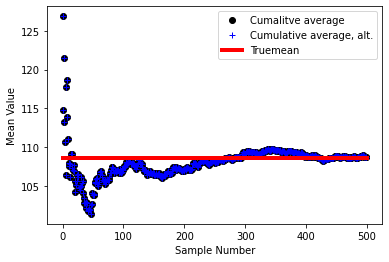

In [25]:
# cumulative average 

cumave = np.zeros(number_of_samples)
for i in range(number_of_samples):
   cumave[i] = np.mean(samplemeans[:i+1])


cumave2= np.cumsum(samplemeans)/np.arange(1,number_of_samples+1)

plt.plot(cumave,'ko',label ='Cumalitve average')
plt.plot(cumave2,'b+',label = 'Cumulative average, alt.')
plt.plot([0,number_of_samples],[true_mean,true_mean],'r',linewidth=4,label='Truemean')
plt.legend()
plt.xlabel('Sample Number')
plt.ylabel('Mean Value')
plt.show


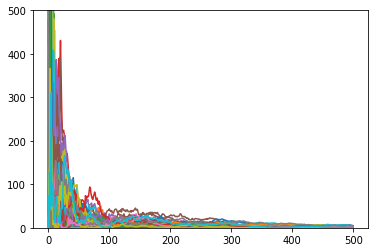

In [29]:
number_of_meta_samples = 100
cumaves= np.zeros((number_of_meta_samples,number_of_samples))

for metai in range(number_of_meta_samples):
  for expi in range(number_of_samples):
   randsample = np.random.choice(population,size=sample_size)
   samplemeans[expi]= np.mean(randsample)
  
  # now get the cumulative average divergences
  tmp = np.cumsum(samplemeans)/np.arange(1,number_of_samples+1)
  cumaves[metai,:]= (tmp-true_mean)**2

plt.plot(cumaves.T)
plt.ylim([0,500])
plt.show()